# Homework w05d04


### Read in the Wisconsin Breast Cancer Dataset

### Assign the columns

The attributes below will be the columns of the dataset.
  
Attribute                     

1. Sample code number [subject ID]
1. Class
1. Cell nucleus mean radius
1. Cell nucleus SE radius
1. Cell nucleus worst radius
1. Texture mean
1. Texture SE
1. Texture worst
1. Perimeter mean
1. Perimeter SE
1. Perimeter worst
1. Area mean
1. Area SE
1. Area worst
1. Smoothness mean
1. Smoothness SE
1. Smoothness worst
1. Compactness mean
1. Compactness SE
1. Compactness worst
1. Concavity mean
1. Concavity SE
1. Concavity worst
1. Concave points mean
1. Concave points SE
1. Concave points worst
1. Symmetry mean
1. Symmetry SE
1. Symmetry worst
1. Fractal dimension mean
1. Fractal dimension SE
1. Fractal dimension worst

The column names are taken from the dataset info file.
For more information check out the information file: wdbc.names.

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, recall_score, precision_score
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)

column_names = ['id','malignant',
                'nucleus_mean','nucleus_se','nucleus_worst',
                'texture_mean','texture_se','texture_worst',
                'perimeter_mean','perimeter_se','perimeter_worst',
                'area_mean','area_se','area_worst',
                'smoothness_mean','smoothness_se','smoothness_worst',
                'compactness_mean','compactness_se','compactness_worst',
                'concavity_mean','concavity_se','concavity_worst',
                'concave_pts_mean','concave_pts_se','concave_pts_worst',
                'symmetry_mean','symmetry_se','symmetry_worst',
                'fractal_dim_mean','fractal_dim_se','fractal_dim_worst']

df.columns = column_names

# Define the feature matrix X
X = df.iloc[:,2:]

#Define the response y and recode it numerically
y = df.malignant
y = y.map(lambda x: 0 if x == "B" else 1)
print y.head()
X.head()

0    1
1    1
2    1
3    1
4    1
Name: malignant, dtype: int64


,nucleus_mean,nucleus_se,nucleus_worst,texture_mean,texture_se,texture_worst,perimeter_mean,perimeter_se,perimeter_worst,area_mean,...,concavity_worst,concave_pts_mean,concave_pts_se,concave_pts_worst,symmetry_mean,symmetry_se,symmetry_worst,fractal_dim_mean,fractal_dim_se,fractal_dim_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### 1. Use the standard scaler to transform the feature matrix X, put the output into a pandas data frame and assign the appropriate column names

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=column_names[2:])

#### Use best subset selection to determine the 5 best predictors

In [3]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
selected_data = selector.fit_transform(X, y)
kbest_columns = X.columns[selector.get_support()]

print list(kbest_columns)

kbest_support = zip(range(len(selector.get_support())),1*selector.get_support())
print [item[0] for item in kbest_support if item[1]==1]
print selector.k

Xbest = pd.DataFrame(selected_data, columns=kbest_columns)

['nucleus_worst', 'perimeter_se', 'concavity_worst', 'concave_pts_se', 'fractal_dim_mean']
[2, 7, 20, 22, 27]
5


#### Use percentile based feature selection, vary the percentile by 5% steps and indicate which features are included.

In [4]:
from sklearn.feature_selection import SelectPercentile
# use e.g.
selector = SelectPercentile(f_classif, percentile=10)

In [5]:
feature_list = []

for i in range(21):
    selector = SelectPercentile(f_classif, percentile=5*i)
    selected_data = selector.fit_transform(X, y)
    kpercentile_columns = X.columns[selector.get_support()]
    kbest_support = zip(range(len(selector.get_support())),1*selector.get_support())
    [feature_list.append((i*5,item[0])) for item in kbest_support if item[1]==1]
    print i*5, np.sum(selector.get_support()), [item[0] for item in kbest_support if item[1]==1]

feature_list = np.array(feature_list)

0 0 []
5 2 [22, 27]
10 3 [7, 22, 27]
15 5 [2, 7, 20, 22, 27]
20 6 [2, 7, 20, 22, 23, 27]
25 8 [0, 2, 3, 7, 20, 22, 23, 27]
30 9 [0, 2, 3, 6, 7, 20, 22, 23, 27]
35 11 [0, 2, 3, 5, 6, 7, 20, 22, 23, 26, 27]
40 12 [0, 2, 3, 5, 6, 7, 20, 22, 23, 25, 26, 27]
45 14 [0, 2, 3, 5, 6, 7, 10, 12, 20, 22, 23, 25, 26, 27]
50 15 [0, 2, 3, 5, 6, 7, 10, 12, 13, 20, 22, 23, 25, 26, 27]
55 16 [0, 2, 3, 5, 6, 7, 10, 12, 13, 20, 21, 22, 23, 25, 26, 27]
60 18 [0, 2, 3, 5, 6, 7, 10, 12, 13, 20, 21, 22, 23, 24, 25, 26, 27, 28]
65 19 [0, 1, 2, 3, 5, 6, 7, 10, 12, 13, 20, 21, 22, 23, 24, 25, 26, 27, 28]
70 21 [0, 1, 2, 3, 4, 5, 6, 7, 10, 12, 13, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28]
75 22 [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28]
80 24 [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
85 25 [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
90 27 [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15,

/Users/crahmede/anaconda/lib/python2.7/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


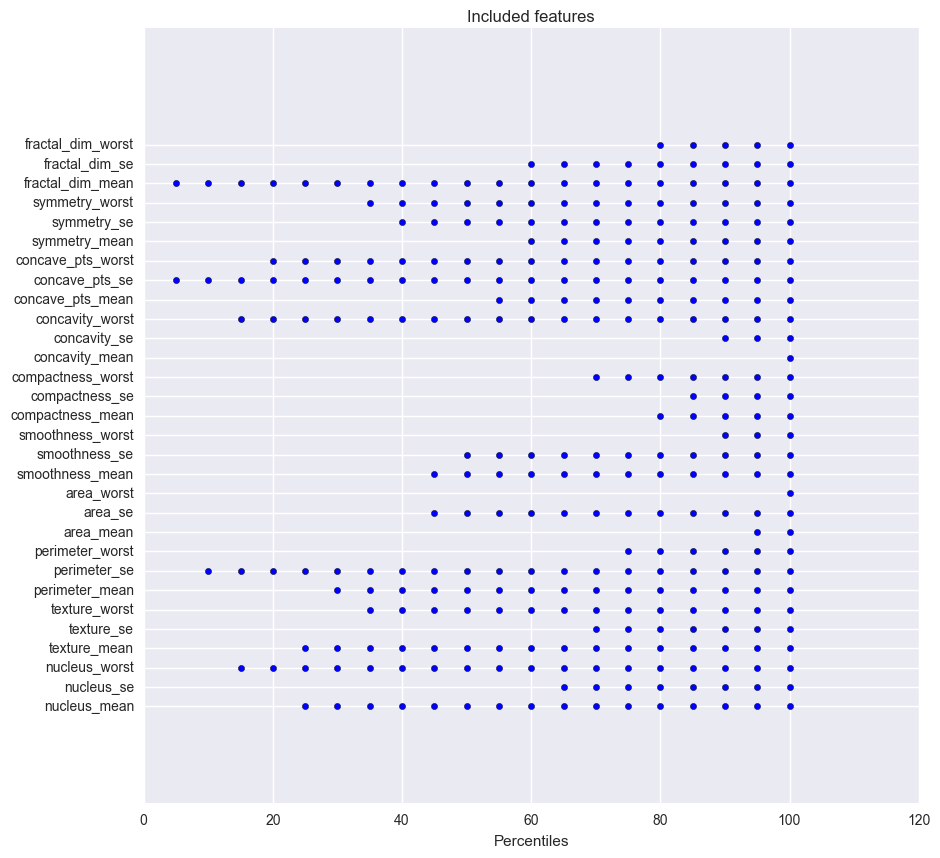

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(feature_list[:,0],feature_list[:,1])
plt.xlabel('Percentiles')
plt.title('Included features')
plt.yticks(range(len(X.columns)),X.columns)
plt.show()

#### Use feature ranking with recursive feature elimination and cross-validated selection for feature selection. Vary the number of cross validations between 2 and 10. How does the number of features change?

In [7]:
from sklearn.feature_selection import RFECV, RFE
from sklearn.linear_model import LogisticRegression

# use e.g. RFECV(estimator, step=1,cv=5)

estimator = LogisticRegression()

feature_list = []
for i in range(2,11):
    selector = RFECV(estimator, step=1,cv=i)
    selector.fit(X,y)
    support_list = zip(range(len(selector.support_)),selector.support_*1)
    [feature_list.append((i,item[0])) for item in (support_list) if item[1]==1]
    print selector.cv, selector.n_features_, selector.support_*1

feature_list = np.array(feature_list)

2 23 [1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1]
3 23 [1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1]
4 30 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
5 30 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
6 25 [1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1]
7 17 [1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0]
8 20 [1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0]
9 27 [1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1]
10 30 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


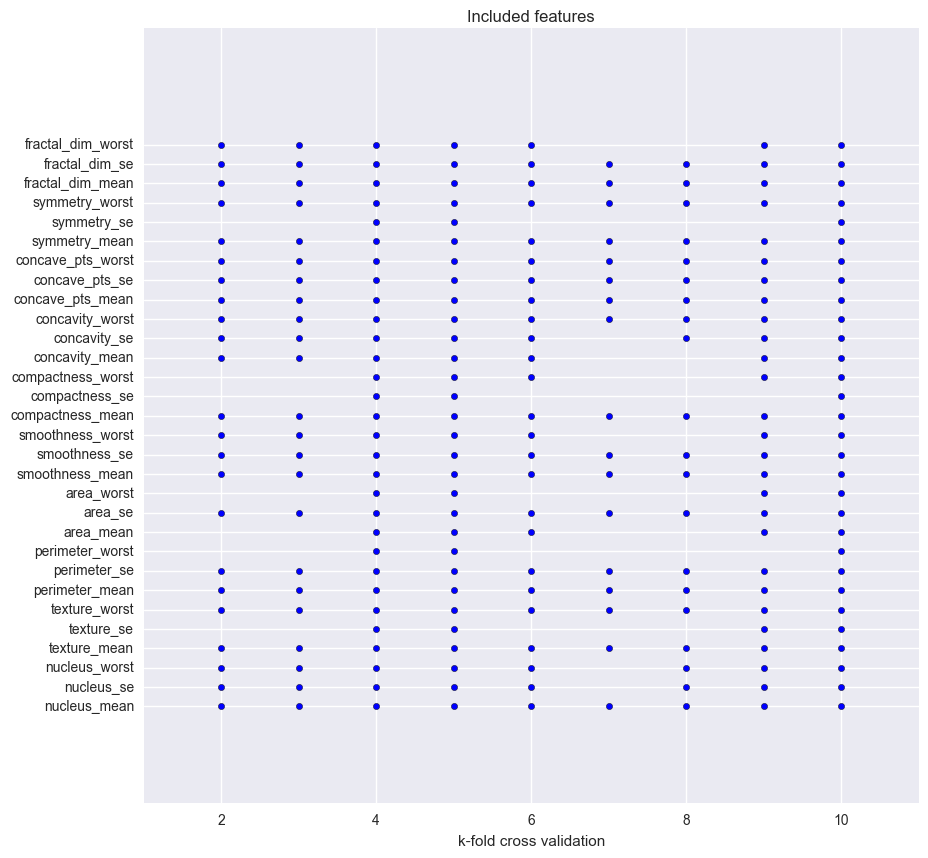

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(feature_list[:,0],feature_list[:,1])
plt.xlabel('k-fold cross validation')
plt.title('Included features')
plt.yticks(range(len(X.columns)),X.columns)
plt.show()

#### Feed RFECV with cv=5 into grid search CV with logistic regression. Vary the regularisation parameters C and the penalty (l1 or l2). Obtain the regression coefficients and determine the five with largest absolute value.

In [18]:
from sklearn.model_selection import GridSearchCV

estimator = LogisticRegression()
selector = RFECV(estimator, step=1, cv=5)

params = {'estimator__penalty':['l1','l2'],
'estimator__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

model = GridSearchCV(selector, param_grid = params)
model_fit = model.fit(X, y)

In [19]:
selector.get_params().keys()

['estimator__solver',
 'scoring',
 'estimator__C',
 'n_jobs',
 'verbose',
 'estimator__fit_intercept',
 'estimator__class_weight',
 'estimator__random_state',
 'estimator__warm_start',
 'estimator__max_iter',
 'estimator__multi_class',
 'step',
 'estimator',
 'estimator__verbose',
 'estimator__dual',
 'estimator__n_jobs',
 'estimator__penalty',
 'estimator__intercept_scaling',
 'cv',
 'estimator__tol']

In [20]:
print model.best_estimator_
print
print model.best_score_

RFECV(cv=5,
   estimator=LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring=None, step=1, verbose=0)

0.980667838313


In [21]:
model_best = model.best_estimator_.estimator
model_best.fit(X,y)
print model_best.score(X,y)

0.985940246046


In [13]:
coeffs = pd.DataFrame(model_best.coef_, columns = X.columns)
coeffs_t = coeffs.transpose()
coeffs_t.columns = ['Coefficients']
coeffs_t.abs().sort_values('Coefficients', ascending=False)[:5]

,Coefficients
concave_pts_mean,0.584244
concavity_worst,0.545763
area_se,0.529399
concave_pts_worst,0.524588
fractal_dim_mean,0.512219


In [14]:
estimator = LogisticRegression()
params2 = {'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
           'penalty': ['l1', 'l2']}
model = GridSearchCV(estimator, param_grid = params2)

model.fit(X, y)

print model.best_estimator_
print
print model.best_score_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.978910369069


In [15]:
estimator.get_params().keys()

['warm_start',
 'C',
 'n_jobs',
 'verbose',
 'intercept_scaling',
 'fit_intercept',
 'max_iter',
 'penalty',
 'multi_class',
 'random_state',
 'dual',
 'tol',
 'solver',
 'class_weight']

In [16]:
coeffs = pd.DataFrame(model.best_estimator_.coef_, columns = X.columns)
coeffs_t = coeffs.transpose()
coeffs_t.columns = ['Coefficients']
coeffs_t.abs().sort_values('Coefficients', ascending=False)[:5]

,Coefficients
concave_pts_mean,0.584244
concavity_worst,0.545763
area_se,0.529399
concave_pts_worst,0.524588
fractal_dim_mean,0.512219


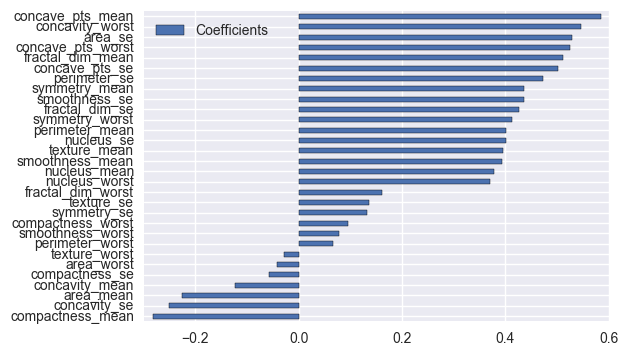

In [17]:
plt.figure(figsize=(20,20))
coeffs_t.sort_values('Coefficients').plot.barh();#(kind='bar')
plt.show();